In [1]:
using CSV, DataFrames
using PyPlot, LaTeXStrings, PyCall, Statistics, Distributions, Dierckx
using KernelDensity: kde
@pyimport numpy as np
@pyimport scienceplots

In [13]:
obs10deg = CSV.read("../MPC/observation/obs_10deg_10ms_EF.csv", DataFrame)
obs20deg= CSV.read("../MPC/observation/obs_20deg_10ms_EF.csv", DataFrame)
obs35deg = CSV.read("../MPC/observation/obs_35deg_10ms_EF.csv", DataFrame)

Row,time,u,v,r,x,y,ψ,x1,y1,x2,y2,δ,n_p,X_wind,Y_wind,N_wind,U_W,Ψ_W,X_F,Y_F,N_F
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,1.4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-3.0,0.0,0.610865,21.2182,7.34376,5.18314e-15,-7.18081e-15,10.0,3.14159,0.0,0.0,0.0
2,0.25,1.40417,-0.0080654,0.00997324,0.35,0.0,0.0,3.35,0.0,-2.65,3.67394e-16,0.610865,21.2182,7.33675,0.0353762,-0.0545393,10.0,3.14159,0.0,0.0,0.0
3,0.5,1.40835,-0.0172498,0.0191358,0.701042,-0.00201635,0.00249331,3.70103,0.00546357,-2.29895,-0.00949627,0.610865,21.2182,7.32954,-0.0336835,0.0519297,10.0,3.14159,0.0,0.0,0.0
4,0.75,1.41245,-0.0274363,0.0276359,1.05314,-0.00545093,0.00727727,4.05306,0.0163807,-1.94678,-0.0272825,0.610865,21.2182,7.32505,-0.198665,0.306264,10.0,3.14159,0.0,0.0,0.0
5,1.0,1.41636,-0.0385188,0.0355911,1.40629,-0.00974015,0.0141862,4.40599,0.0328172,-1.5934,-0.0522975,0.610865,21.2182,7.32942,-0.452719,0.697763,10.0,3.14159,0.0,0.0,0.0
6,1.25,1.41998,-0.0503983,0.043094,1.76049,-0.0143458,0.023084,4.75969,0.0549001,-1.23871,-0.0835917,0.610865,21.2182,7.35079,-0.790479,1.21765,10.0,3.14159,0.0,0.0,0.0
7,1.5,1.42321,-0.0629809,0.0502165,2.11568,-0.0187481,0.0338575,5.11396,0.0828051,-0.882603,-0.120301,0.610865,21.2182,7.39813,-1.20797,1.85865,10.0,3.14159,0.0,0.0,0.0
8,1.75,1.42597,-0.0761746,0.0570127,2.47181,-0.0224399,0.0464117,5.46858,0.116745,-0.52496,-0.161625,0.610865,21.2182,7.48016,-1.70258,2.61463,10.0,3.14159,0.0,0.0,0.0
9,2.0,1.42816,-0.0898878,0.0635216,2.8288,-0.0249237,0.0606648,5.82328,0.156959,-0.165681,-0.206807,0.610865,21.2182,7.60433,-2.27314,3.48028,10.0,3.14159,0.0,0.0,0.0


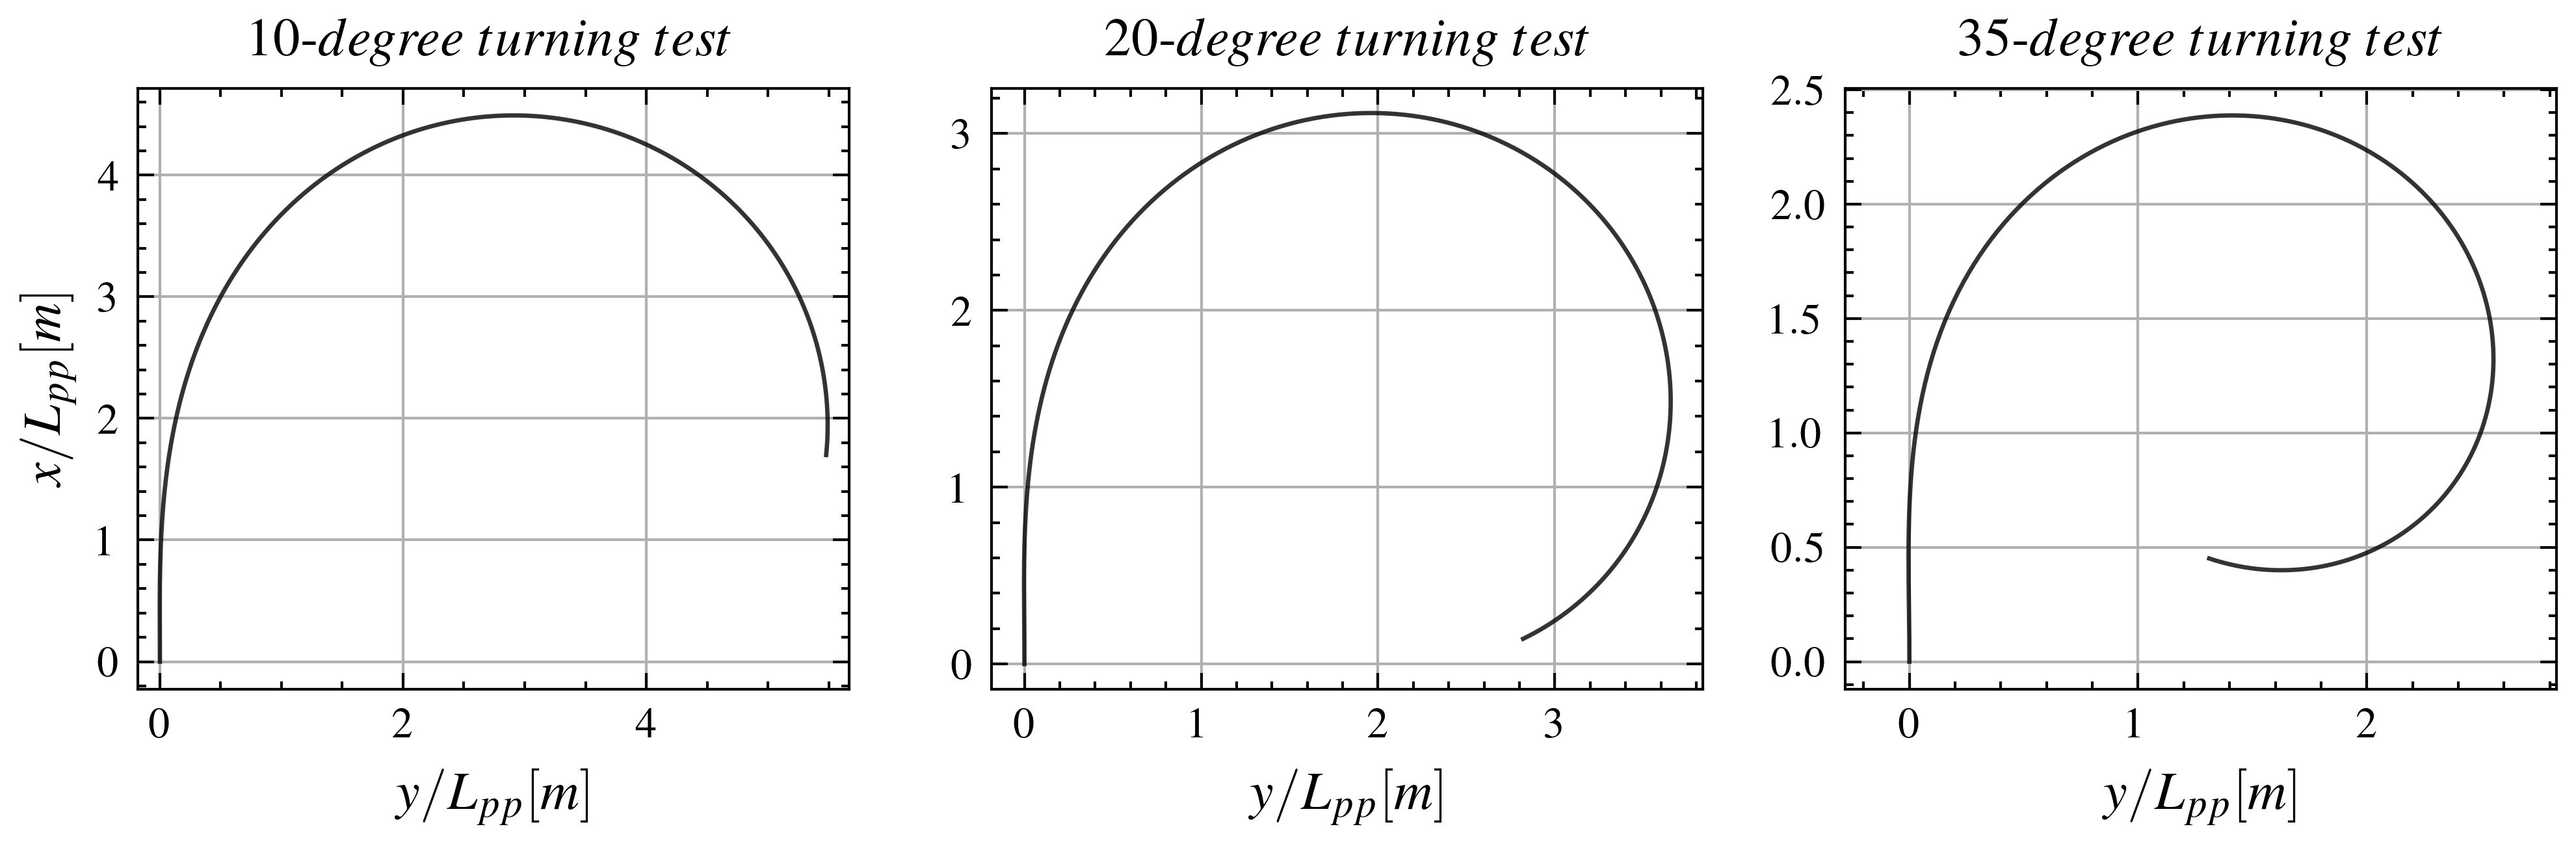

In [14]:
plt.style.use(["science", "ieee"])

fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(1, 3, 1)
ax.set_title(L"10\mathchar`-degree~turning~test", fontsize=10)
ax.plot(obs10deg[1:201,"y"]/7.0, obs10deg[1:201,"x"]/7.0, "-", label="observation", c="k", alpha=0.8, linewidth=0.8)
ax.set_ylabel(L"x/L_{pp}[m]", fontsize=10)
ax.set_xlabel(L"y/L_{pp}[m]", fontsize=10)
# ax.legend(frameon=true, loc="lower right", fontsize=8)
ax.axis("equal")
ax.grid()

ax = fig.add_subplot(1, 3, 2)
ax.set_title(L"20\mathchar`-degree~turning~test", fontsize=10)
ax.plot(obs20deg[1:201,"y"]/7.0, obs20deg[1:201,"x"]/7.0, "-", label="observation", c="k", alpha=0.8, linewidth=0.8)
ax.set_xlabel(L"y/L_{pp}[m]", fontsize=10)
# ax.legend(frameon=true, loc="lower right", fontsize=8)
ax.axis("equal")
ax.grid()

ax = fig.add_subplot(1, 3, 3)
ax.set_title(L"35\mathchar`-degree~turning~test", fontsize=10)
ax.plot(obs35deg[1:201,"y"]/7.0, obs35deg[1:201,"x"]/7.0, "-", label="observation", c="k", alpha=0.8, linewidth=0.8)
ax.set_xlabel(L"y/L_{pp}[m]", fontsize=10)
# ax.legend(frameon=true, loc="lower right", fontsize=8)
ax.axis("equal")
ax.grid()

display(fig)

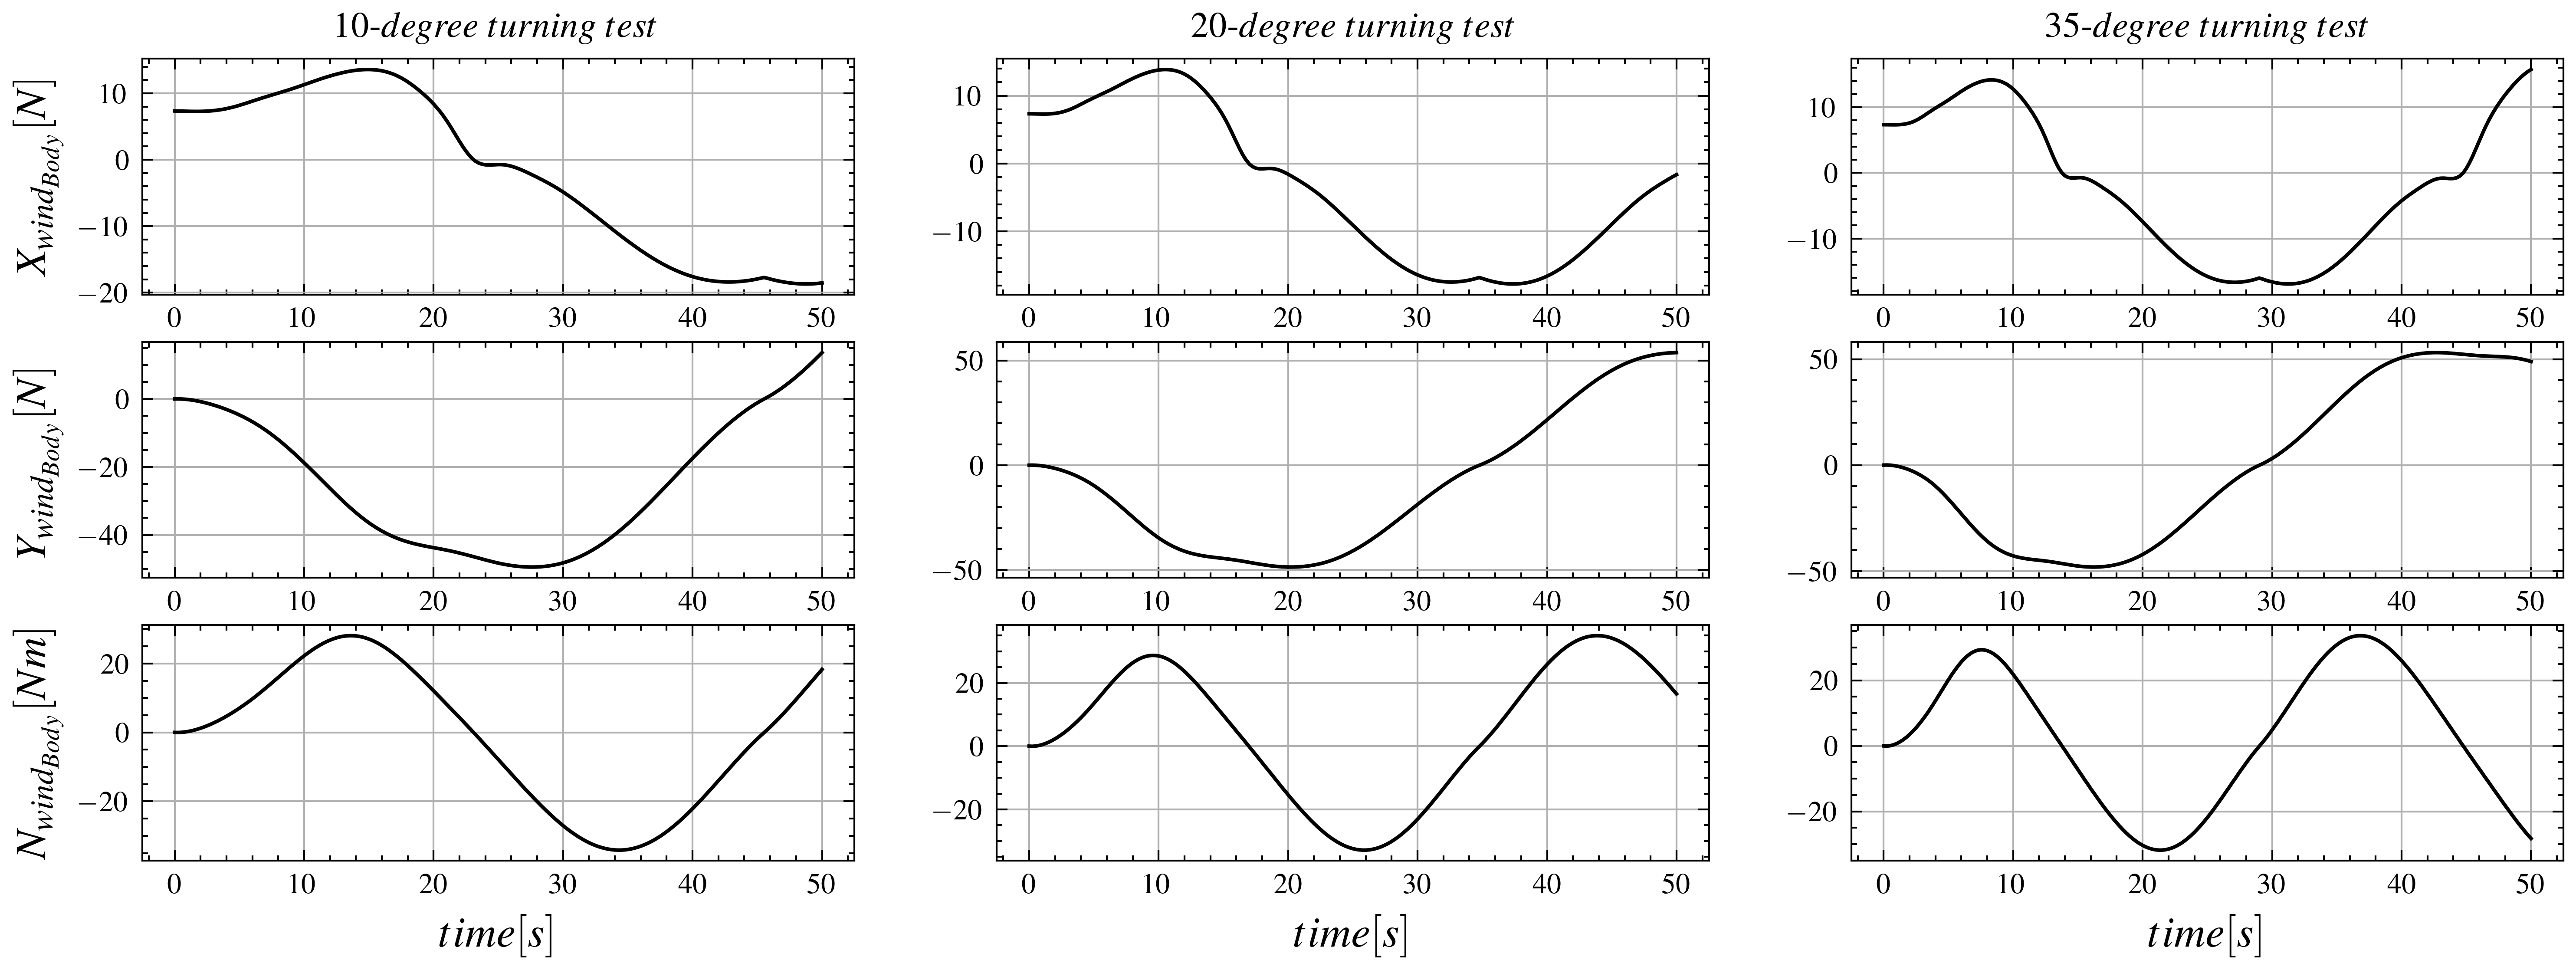

In [17]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(3, 3, 1)
ax.set_title(L"10\mathchar`-degree~turning~test", fontsize=10)
ax.plot(obs10deg[1:201,"time"], obs10deg[1:201,"X_wind"], "-", c="k", linewidth=1)
ax.set_ylabel(L"X_{wind_{Body}}[N]", fontsize=12)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(3, 3, 4)
ax.plot(obs10deg[1:201,"time"], obs10deg[1:201,"Y_wind"], "-", c="k", linewidth=1)
ax.set_ylabel(L"Y_{wind_{Body}}[N]", fontsize=12)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(3, 3, 7)
ax.plot(obs10deg[1:201,"time"], obs10deg[1:201,"N_wind"], "-", c="k", linewidth=1)
ax.set_ylabel(L"N_{wind_{Body}}[Nm]", fontsize=12)
# 
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()


ax = fig.add_subplot(3, 3, 2)
ax.set_title(L"20\mathchar`-degree~turning~test", fontsize=10)
ax.plot(obs20deg[1:201,"time"], obs20deg[1:201,"X_wind"], "-", c="k", linewidth=1)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(3, 3, 5)
ax.plot(obs20deg[1:201,"time"], obs20deg[1:201,"Y_wind"], "-", c="k", linewidth=1)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(3, 3, 8)
ax.plot(obs20deg[1:201,"time"], obs20deg[1:201,"N_wind"], "-", c="k", linewidth=1)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()


ax = fig.add_subplot(3, 3, 3)
ax.set_title(L"35\mathchar`-degree~turning~test", fontsize=10)
ax.plot(obs35deg[1:201,"time"], obs35deg[1:201,"X_wind"], "-", c="k", linewidth=1)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(3, 3, 6)
ax.plot(obs35deg[1:201,"time"], obs35deg[1:201,"Y_wind"], "-", c="k", linewidth=1)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(3, 3, 9)
ax.plot(obs35deg[1:201,"time"], obs35deg[1:201,"N_wind"], "-", c="k", linewidth=1)
# 
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()
display(fig)

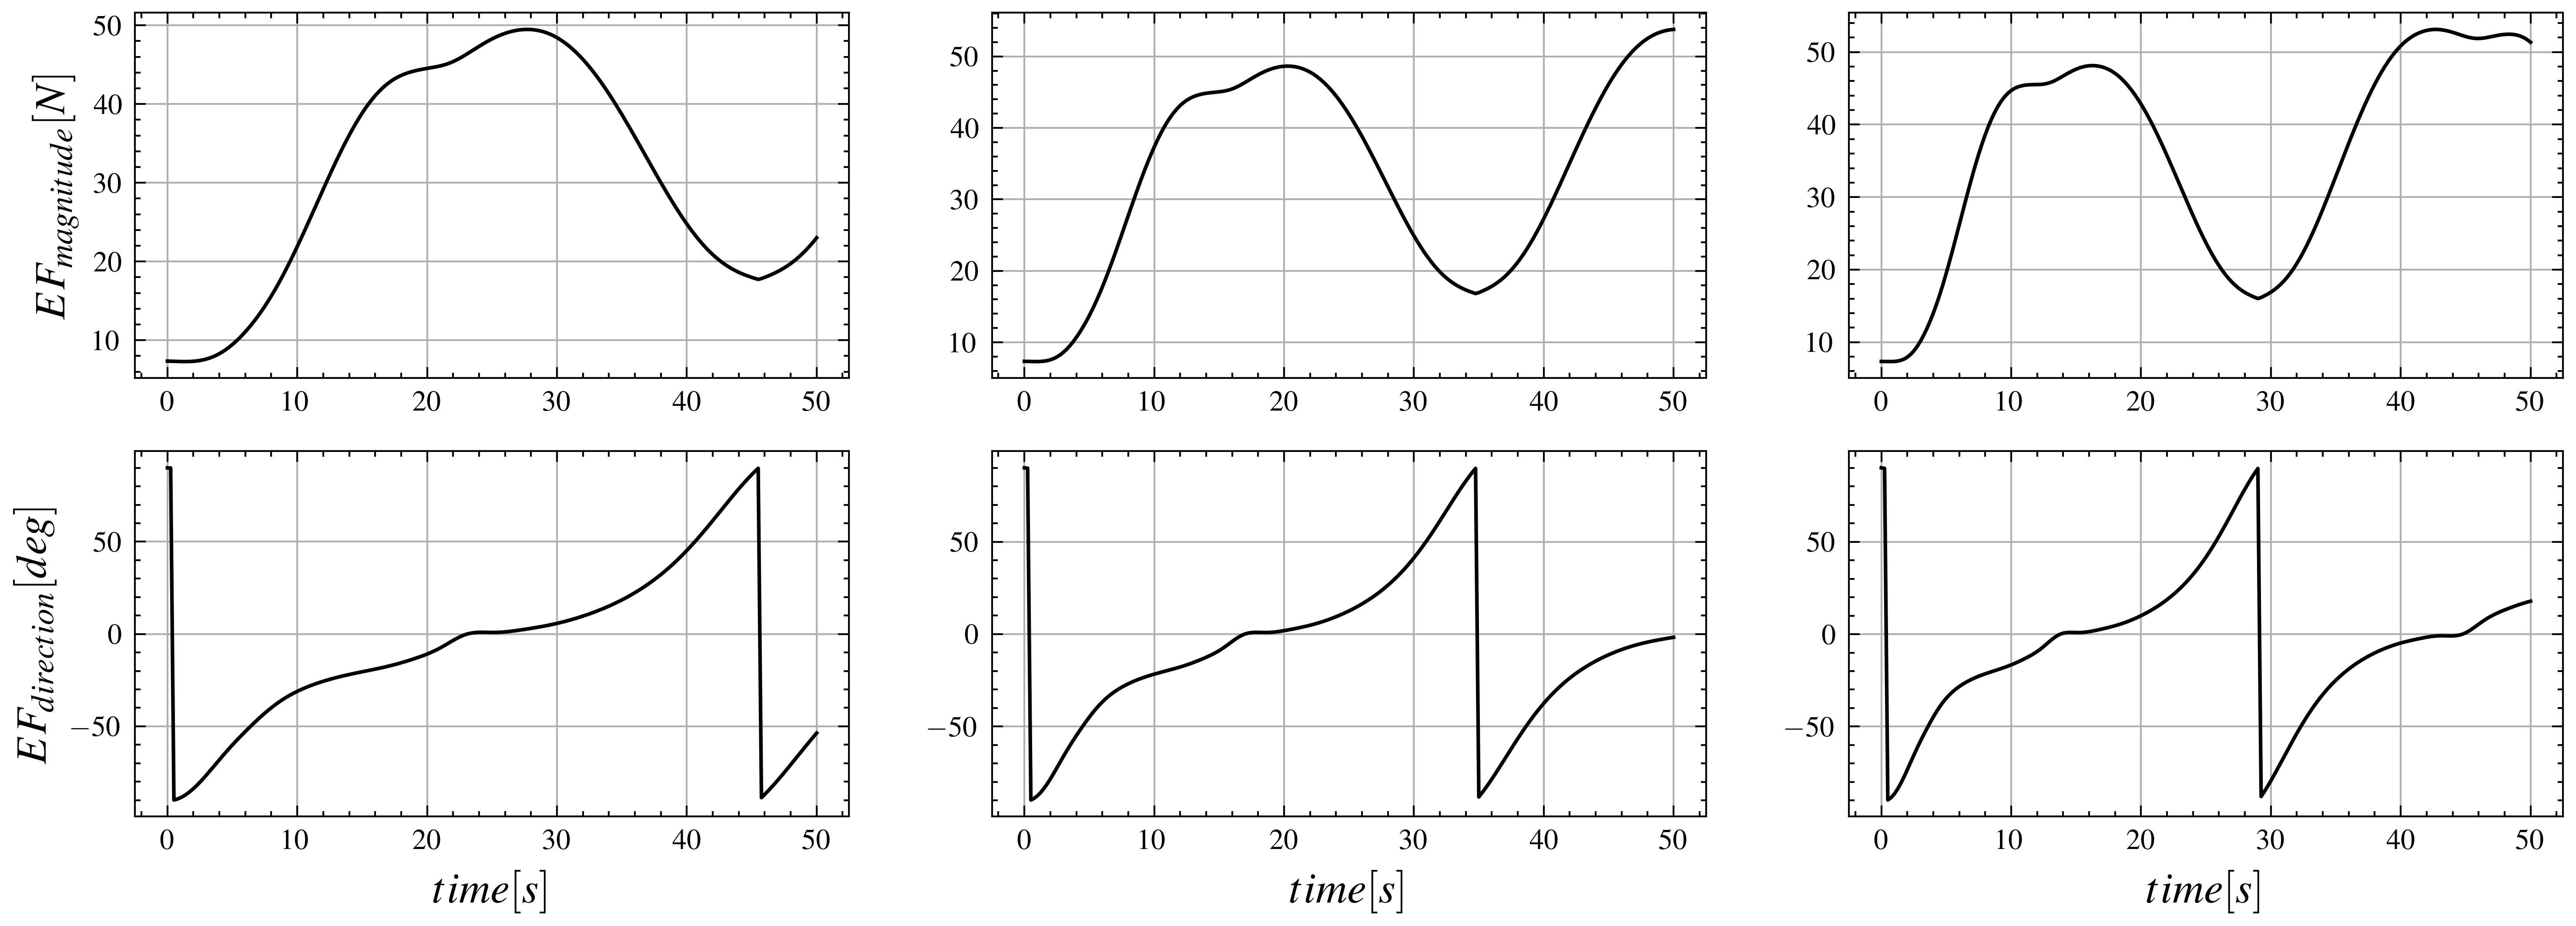

In [16]:
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(2, 3, 1)
ax.plot(obs10deg[1:201,"time"], sqrt.(obs10deg[1:201,"X_wind"].^2 .+ obs10deg[1:201,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
ax.set_ylabel(L"EF_{magnitude}[N]", fontsize=12)
ax.grid()

ax = fig.add_subplot(2, 3, 4)
ax.plot(obs10deg[1:201,"time"], atan.(obs10deg[1:201,"X_wind"]./obs10deg[1:201,"Y_wind"])./pi.*180, "-", c="k", alpha=1, linewidth=1)
ax.set_ylabel(L"EF_{direction}[deg]", fontsize=12)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()

ax = fig.add_subplot(2, 3, 2)
ax.plot(obs20deg[1:201,"time"], sqrt.(obs20deg[1:201,"X_wind"].^2 .+ obs20deg[1:201,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
ax.grid()

ax = fig.add_subplot(2, 3, 5)
ax.plot(obs20deg[1:201,"time"], atan.(obs20deg[1:201,"X_wind"]./obs20deg[1:201,"Y_wind"])./pi.*180, "-", c="k", alpha=1, linewidth=1)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()

ax = fig.add_subplot(2, 3, 3)
ax.plot(obs35deg[1:201,"time"], sqrt.(obs35deg[1:201,"X_wind"].^2 .+ obs35deg[1:201,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
ax.grid()

ax = fig.add_subplot(2, 3, 6)
ax.plot(obs35deg[1:201,"time"], atan.(obs35deg[1:201,"X_wind"]./obs35deg[1:201,"Y_wind"])./pi.*180, "-", c="k", alpha=1, linewidth=1)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()

display(fig)